<a href="https://colab.research.google.com/github/booorayan/DecisionTrees-SVM/blob/master/Testing_for_Hypothyroidism_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing for Hypothyroidism Using Machine Learning Models

## Defining the Question

### a) Specifying the Question

Create models that determine whether or not a patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metrics for Success



1.   At least 2 advanced decision tree models that determine whether or not a patient has hypothyroid based on the patient's symptoms
2.   An SVM model that predicts whether a patient has hypothyroid based on the symptoms







### c) Understanding the Context

Nairobi Hospital seeks to use a machine learning model to test for hypothyroidism. This model is to help the hospital to better diagnose hypothyroid patients. 

### d) Experimental Design

The experimental design for this project was in adherence to the CRISP-DM methodology.
The project was conducted in the following phases:

1.   Problem Understanding
2.   Data Understanding
3.   Data Preparation
4.   Modelling
5.   Evaluation


### e) Data Relevance/ Appropriateness of Data

The dataset used for this project focused on Thyroid patients. The dataset can facilitate the realization of the project objectives as it contains information on the symptoms that can help inform if a patient has hypothyroidism or not 

## Importing Required Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, \
GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [0]:
import torch
# print(torch.cuda.get_device_name(0))

## Loading the Dataset

In [7]:
# Loading the dataset and reading it as a csv
hypot = pd.read_csv('/content/hypothyroid.csv')

# previewing the first five observations in the dataframe
hypot.head()

# previewing the last five observations in the dataframe
print('\n')
hypot.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


## Exploring & Tidying the Data

In [8]:
# checking the column names of the dataset
hypot.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [9]:
# checking for the no. of null values in the columns and the datatype of the columns
hypot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

All the columns are of object(string) datatype. This will be changed as it should not be the case.

There are 3163 rows and 26 columns in the dataframe

In [10]:
# checking for null values in the dataframe
hypot.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

The isnull() function returns 0 null values. However, a preview of th first five observations revealed values with question marks, which can be considered to be nul values

In [11]:
# checking for unique values in categorical columns in the dataframe
cat_cols = ['status', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', \
            'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'sick', 'tumor', 'lithium', 'goitre', \
            'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

# printing the column name and unique values in each column
for col in cat_cols:
  print(('\033[1m' + col + '\033[0m') + ':' + str(hypot[col].unique()))

status:['hypothyroid' 'negative']
sex:['M' 'F' '?']
on_thyroxine:['f' 't']
query_on_thyroxine:['f' 't']
on_antithyroid_medication:['f' 't']
thyroid_surgery:['f' 't']
query_hypothyroid:['f' 't']
query_hyperthyroid:['f' 't']
pregnant:['f' 't']
sick:['f' 't']
sick:['f' 't']
tumor:['f' 't']
lithium:['f' 't']
goitre:['f' 't']
TSH_measured:['y' 'n']
T3_measured:['y' 'n']
TT4_measured:['y' 'n']
T4U_measured:['y' 'n']
FTI_measured:['y' 'n']
TBG_measured:['n' 'y']


In [12]:
# checking for unique values in the nurical variables

h = hypot.columns[~hypot.columns.isin(cat_cols)]
for col in h:
  print(col + ':\n' + str(hypot[col].unique()), '\n');

age:
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93'] 

TSH:
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' '6.50' '20' '7.50'
 '14' '60' '140' '33' '8.70' '0.25' '10.70' '82' '45' '42' '41' '160' '16'
 '89' '44' '176' '6.40' '183' '29' '37' '39' '7.90' '59' '68' '38' '47'
 '143' '6.60' '

In [13]:
# creating a new dataframe that replaces '?' with null values
hypo_cl = hypot.replace('?', np.nan)

# confirming the changes have been effected
hypo_cl.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN


In [14]:
# converting the column names to lowercase for uniformity.
hypo_cl.columns = hypo_cl.columns.str.lower()
hypo_cl.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [15]:
# checking for null values again
hypo_cl.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           468
t3_measured                     0
t3                            695
tt4_measured                    0
tt4                           249
t4u_measured                    0
t4u                           248
fti_measured                    0
fti                           247
tbg_measured                    0
tbg                          2903
dtype: int64

After replacing the ? entries with null values, we now have a high number of null values in the dataframe

In [16]:
# checking for the percent of missing values in dataset
pct_missing = (hypo_cl.isnull().sum().sum() / hypo_cl.size) * 100
print('Percentage of missing values: {:.2f}%' .format(pct_missing))

Percentage of missing values: 6.48%


Percent of missing/null values is greater than 5% and dropping them is thus not appropriate. They'll have to be imputed

In [17]:
# we'll use labelencoder because the categorical columns mostly have two - three distinct values
# instantiating the label encoder object
labelenc = LabelEncoder()

# fitting and transforming the status column using label encoder object
# 0 represents hypothyroidism and 1 represents negative
hypo_cl['status'] = labelenc.fit_transform(hypo_cl['status'])

# replacing string values with numbers 0 and 1 
# 0 represents male, 1 represents females
# f/false is transformed to 0 and t/true is transformed to 1,
# y/yes is transformed to 1 and n/no is transformed to 0. 
hypo_cl['sex'].replace({'M':0, 'F':1}, inplace=True)
hypo_cl.replace({'f':0,'t':1, 'y':1, 'n':0}, inplace=True)

# previewing the first five observations of the dataset
hypo_cl.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,0,72,0.0,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10,0,NaN
1,0,15,1.0,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17,0,NaN
2,0,24,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0,0,NaN
3,0,24,1.0,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.40,1,6,1,1.04,1,6,0,NaN
4,0,77,0.0,0,0,0,0,0,0,0,0,0,0,0,1,7.30,1,1.20,1,57,1,1.28,1,44,0,NaN


In [18]:
# confirming the change of datatypes
hypo_cl.dtypes

status                         int64
age                           object
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
tsh_measured                   int64
tsh                           object
t3_measured                    int64
t3                            object
tt4_measured                   int64
tt4                           object
t4u_measured                   int64
t4u                           object
fti_measured                   int64
fti                           object
tbg_measured                   int64
tbg                           object
dtype: object

In [19]:
# converting columns of object datatype to integer datatype using pd.to_numeric function
obcols = hypo_cl.columns[hypo_cl.dtypes == object]

hypo_cl[obcols ]= hypo_cl[obcols].apply(pd.to_numeric, errors='coerce')

# confirming the change has been effected
hypo_cl.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null int64
age                          2717 non-null float64
sex                          3090 non-null float64
on_thyroxine                 3163 non-null int64
query_on_thyroxine           3163 non-null int64
on_antithyroid_medication    3163 non-null int64
thyroid_surgery              3163 non-null int64
query_hypothyroid            3163 non-null int64
query_hyperthyroid           3163 non-null int64
pregnant                     3163 non-null int64
sick                         3163 non-null int64
tumor                        3163 non-null int64
lithium                      3163 non-null int64
goitre                       3163 non-null int64
tsh_measured                 3163 non-null int64
tsh                          2695 non-null float64
t3_measured                  3163 non-null int64
t3                           2468 non-null float64
tt4

In [0]:
# dealing with the null values


## Exploratory Data Analysis

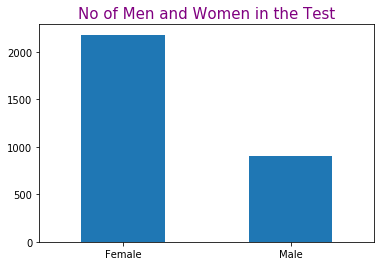

In [20]:
# plotting a barplot of the distributions of genders in the dataset
hypo_cl.sex.value_counts().plot(kind='bar')
plt.xticks((np.arange(0, 2,)), ('Female', 'Male'), rotation=360)
plt.title('No of Men and Women in the Test', fontsize=15, color='purple')
plt.show()


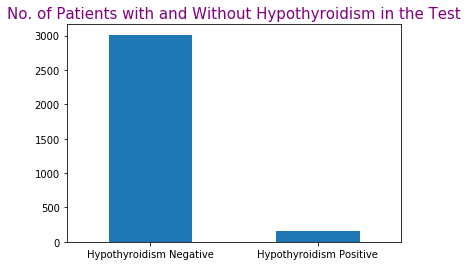

In [21]:
# plotting the bargraph showing the no. of patients with hypothyroidism and negative
hypo_cl.status.value_counts().plot(kind='bar')
plt.xticks(hypo_cl.status.unique(), labels=['Hypothyroidism Negative', 'Hypothyroidism Positive'], rotation=360)
plt.title('No. of Patients with and Without Hypothyroidism in the Test', fontsize=15, color='purple')
plt.show()


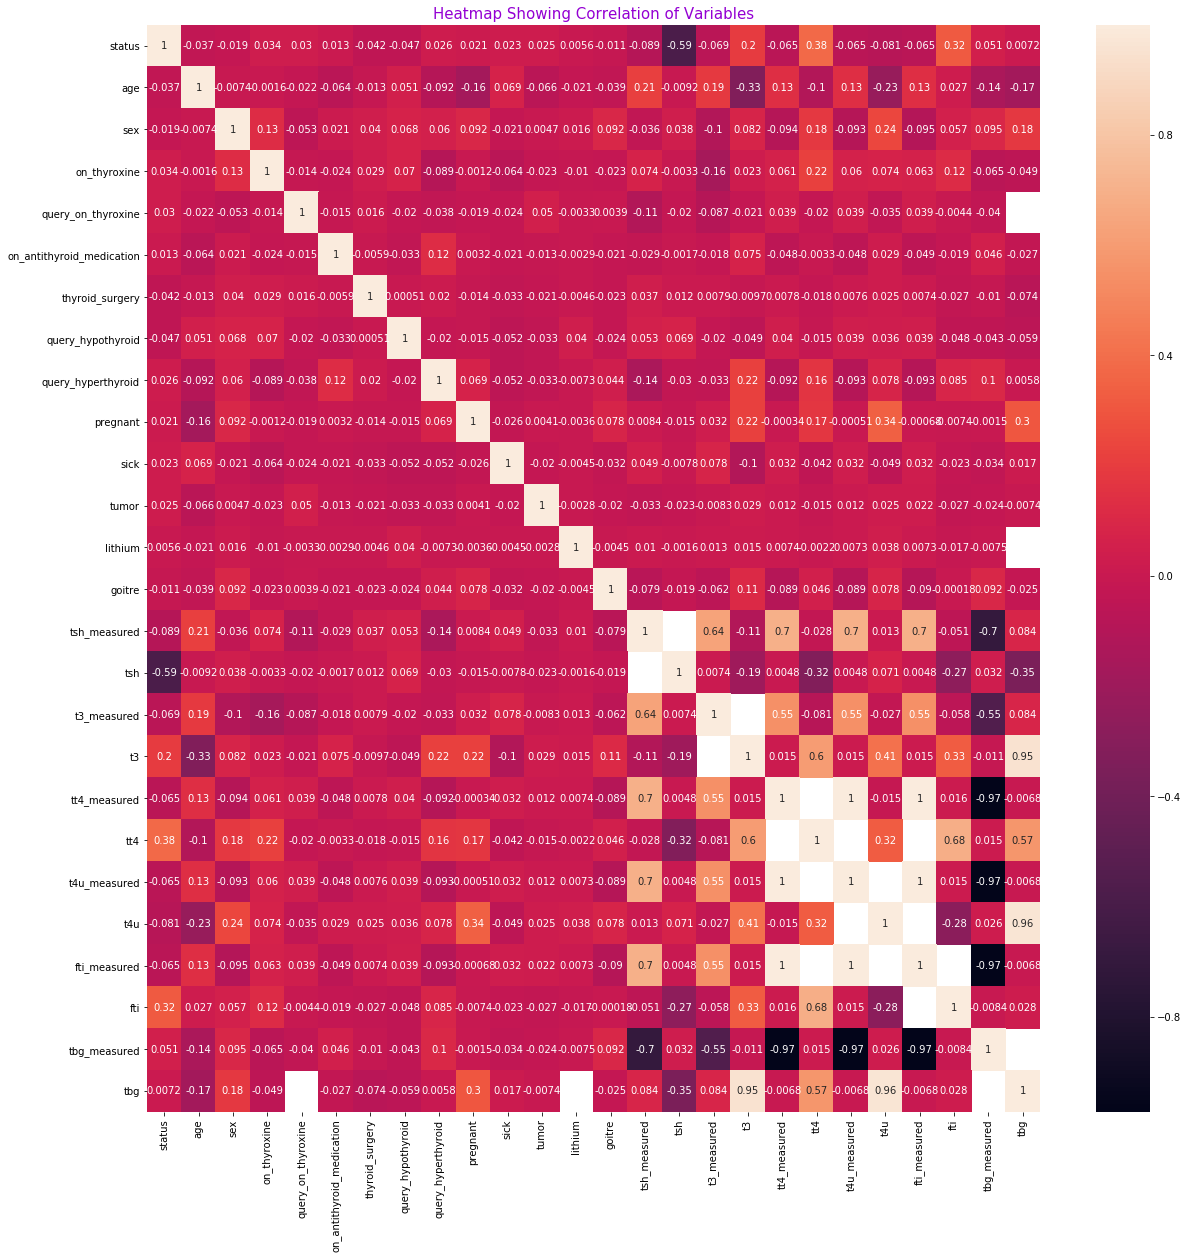

In [22]:
# plotting a heatmap showing correlation of variables
plt.figure(figsize=(20,20))
sns.heatmap(hypo_cl.corr(), annot=True)
plt.title('Heatmap Showing Correlation of Variables', fontsize=15, color='darkviolet')
plt.show()

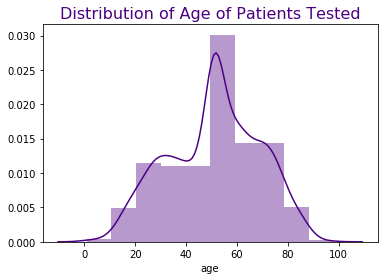

In [88]:
# plotting a histogram showing the distribution of age of patients
sns.distplot(hypo_cl['age'], bins=10, color='indigo')
plt.title('Distribution of Age of Patients Tested', fontsize=16, color='indigo')
plt.show();

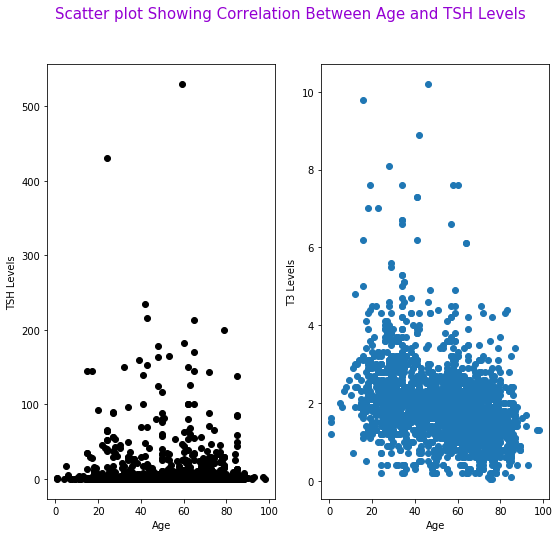

In [24]:
# checking for correlation between age and tsh levels using scatter plot
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(9,8))
ax1.scatter(hypo_cl.age, hypo_cl.tsh, c='k')
ax2.scatter(hypo_cl.age, hypo_cl.t3)
ax1.set_xlabel('Age')
ax2.set_xlabel('Age')
ax1.set_ylabel('TSH Levels')
ax2.set_ylabel('T3 Levels')
fig.suptitle('Scatter plot Showing Correlation Between Age and TSH Levels', fontsize=15, color='darkviolet')
plt.show()

From the scatter plots, one can conclude that there is a weak/no correlation between Age and TSH/T3 levels.

In [0]:
boolcols = ['sex', 'thyroid_surgery', 'on_antithyroid_medication']


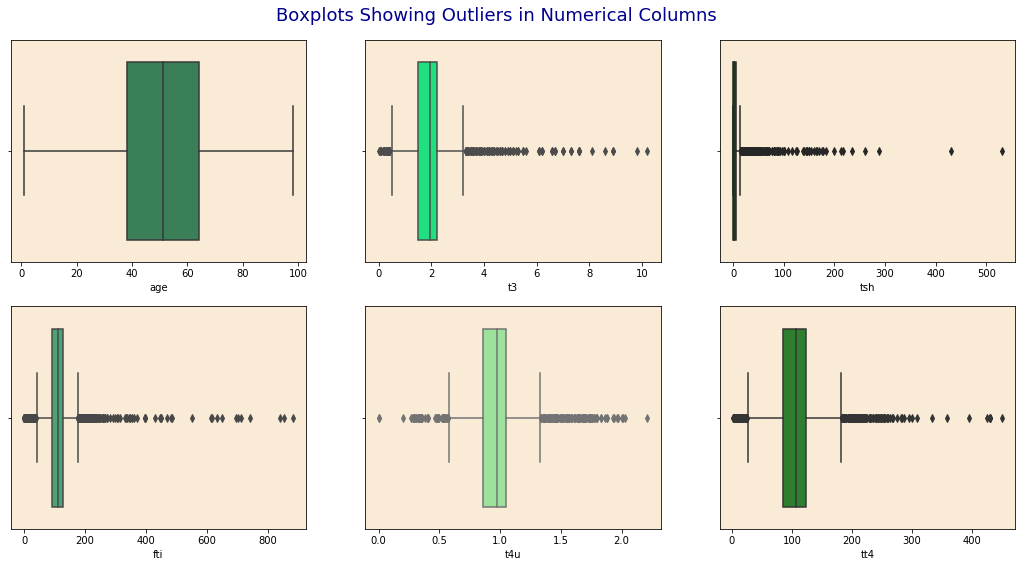

In [96]:
# creating a list of columns to check for outliers using boxplots
var_cols = ['age', 't3', 'tsh', 'fti', 't4u', 'tt4']

# crating a list of colors for the boxplots
colors = ['seagreen', 'springgreen', 'green', 'mediumseagreen', 'lightgreen', 'forestgreen']

# plotting the boxplots
figgg, axes = plt.subplots(2,3, figsize=(18,9))
plt.suptitle('Boxplots Showing Outliers in Numerical Columns', fontsize=18, color='darkblue', y=0.93)

for ax, data, col, color in zip(axes.flatten(), hypo_cl, var_cols, colors):
  sns.boxplot(hypo_cl[col], ax=ax, color=color)
  ax.set_facecolor('antiquewhite')
plt.show();


The boxplots reveal prevalence of outliers in all the plotted columns except the age column.

For this project, we will not remove outliers as some are reasonable 

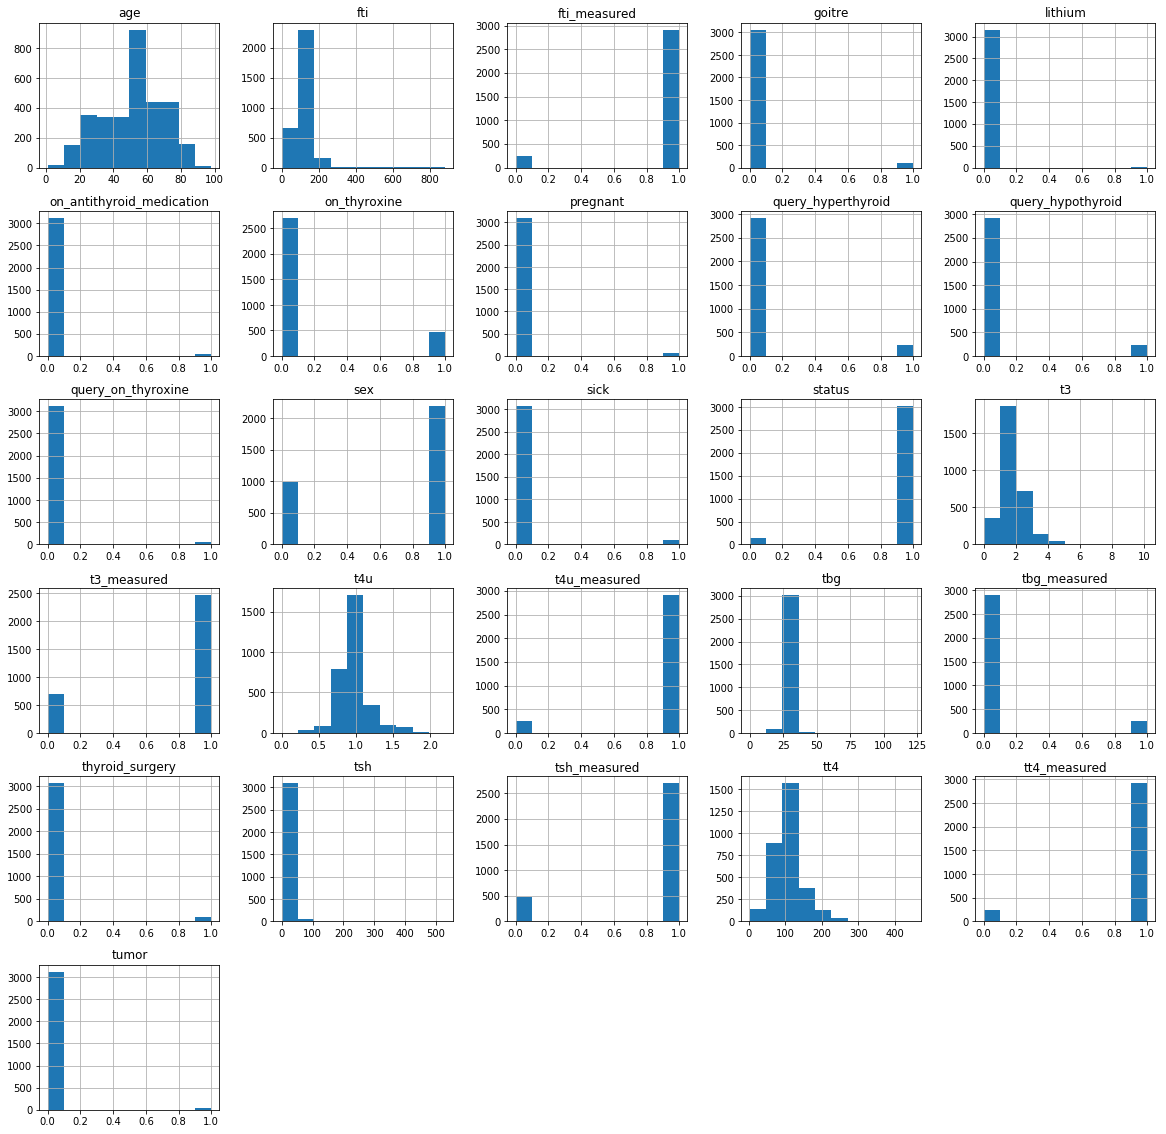

In [91]:
# checking the distribution of all the variables in the dataset using hist function
# the distributions will help inform how we impute our missing values
hypo_cl.hist(figsize=(20,20), )

plt.show();

In [28]:
# Dealing with the null values
mean_col = ['age', 'tsh', 't4u', 'tbg', 't3', 'tt4', 'fti']

# filling missing values in columns in mean_col list with mean values of each column
for col in mean_col:
  hypo_cl[col].fillna(hypo_cl[col].mean(), inplace=True)

# filling null values in sex column with 0 to increase the number of male entries
hypo_cl['sex'].fillna(0, inplace = True)

# checking for null values after imputing
hypo_cl.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
tbg_measured                 0
tbg                          0
dtype: int64

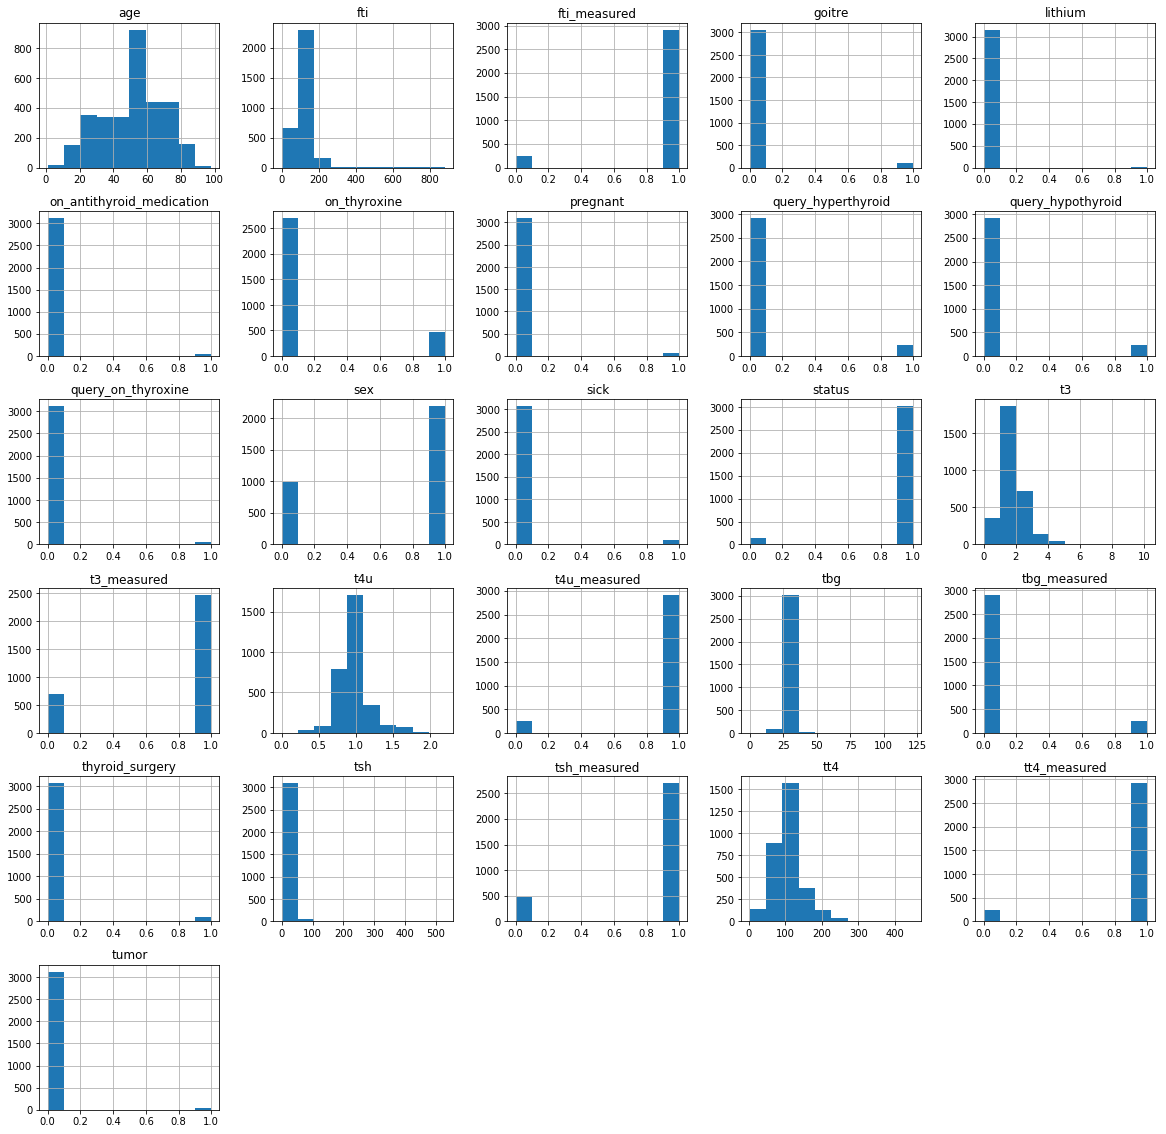

In [29]:
hypo_cl.hist(figsize=(20,20))
plt.show()

## Modelling 

In [0]:
# defining our features and target variable
features = hypo_cl.drop('status', 1)
target = hypo_cl['status']

### Using Random Forest Classifier

In [31]:
# splitting the data into training and test sets.
# we set the size of the test set to be 25% of the dataset
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=.25, random_state=34)
print('Features Training Set shape: ', features_train.shape, '\nTarget Training Set Shape:', target_train.shape)
print('Features Test Set shape: ', features_test.shape, '\nTarget Test Set Shape:', target_test.shape)

Features Training Set shape:  (2372, 25) 
Target Training Set Shape: (2372,)
Features Test Set shape:  (791, 25) 
Target Test Set Shape: (791,)


We have 25 variables as the features for our models

The status column is our target/dependent variable

In [0]:
# scaling the train and test sets using stadard scaler
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [0]:
# instantiating the random forest classifier object
# we pass four parameters in the random forest classifier: n_estimators, random_state, \
# min_samples_split, and max_depth
rfc = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=20, max_depth=5)
rfc = rfc.fit(features_train, target_train)

# making predictions based on the model trained 
rfc_pred = rfc.predict(features_test)

In [34]:
comparison_frame = pd.DataFrame({'Actual': target_test, 'Predicted': rfc_pred})
comparison_frame.head()

,Actual,Predicted
1752,1,1
1643,1,1
2410,1,1
2561,1,1
103,0,0


In [35]:
comparison_frame.describe()

,Actual,Predicted
count,791.000000,791.000000
mean,0.963338,0.959545
std,0.188051,0.197149
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [36]:
# Assessing the errors of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(target_test, rfc_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(target_test, rfc_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test, rfc_pred)))
print('R2 squared:', metrics.r2_score(target_test, rfc_pred)) 
print('Accuracy Score:', metrics.accuracy_score(target_test, rfc_pred))


Mean Absolute Error: 0.008849557522123894
Mean Squared Error: 0.008849557522123894
Root Mean Squared Error: 0.09407208683835973
R2 squared: 0.7494343379491357
Accuracy Score: 0.9911504424778761


Random Forest Classifier Predicts with an accuracy 99.11%

The Classifier also has a high R squared value, indicating that the independent variables explain a great amount of the variation in the dependent variable

The rmse of the model is also very low at 0.094, indicating the model is a good prediction model.

In [37]:
 fract = np.sqrt(metrics.mean_squared_error(target_test, rfc_pred)) / comparison_frame.Actual.mean()
 print('Percent of rmse wrt mean: ' + str(np.around(fract * 100, decimals=2))+ '%')

Percent of rmse wrt mean: 9.77%


The percentage of rmse (9.7%) with regard to mean of predicted values is less than 10% of mean, meaning the random forest classifier model is a good prediction  model. 

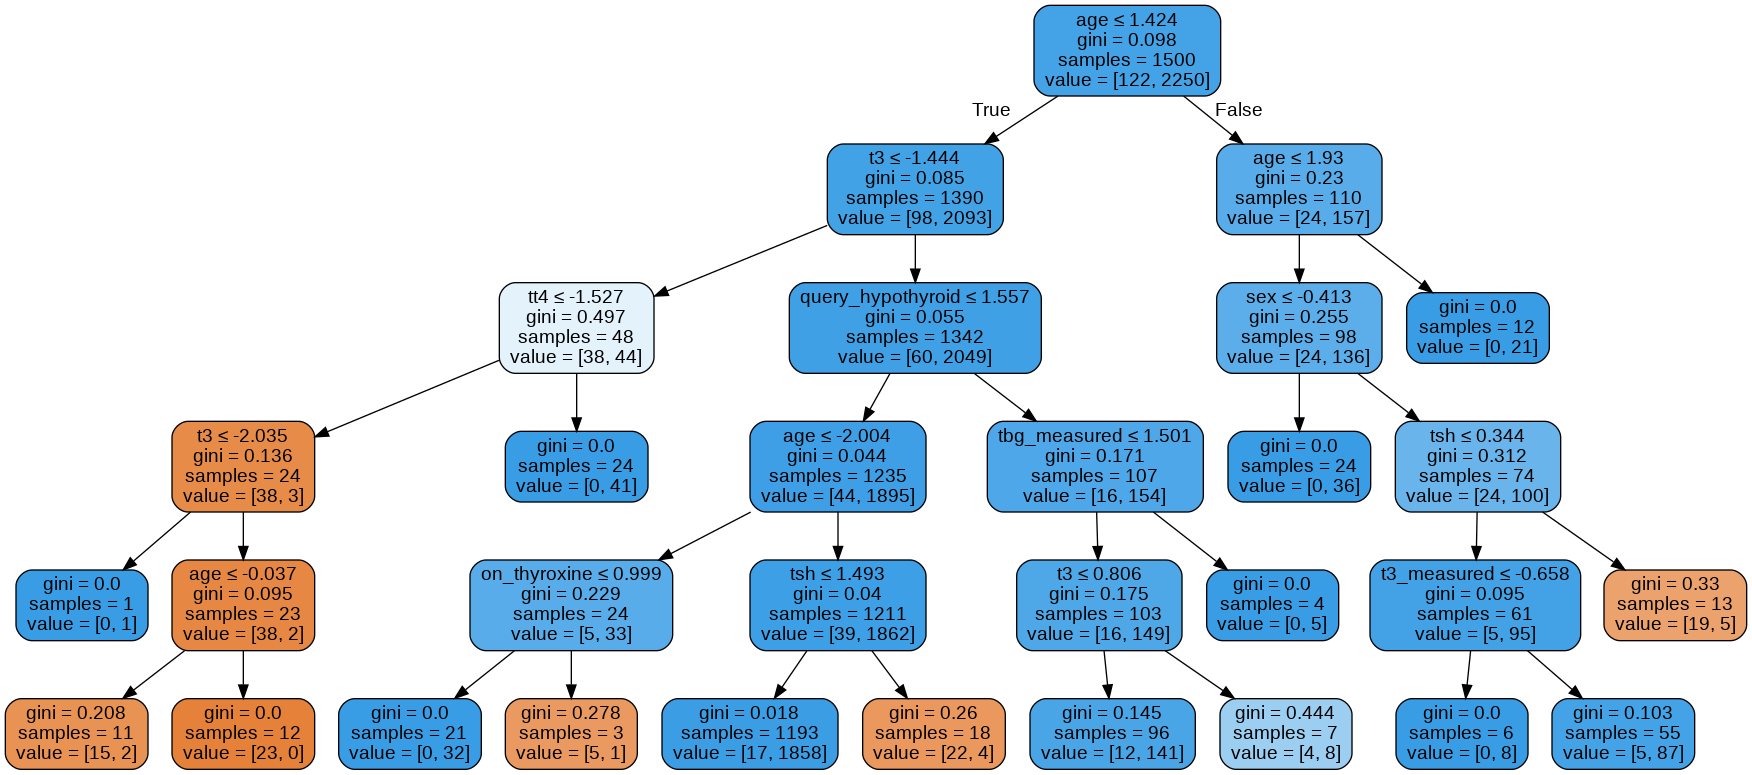

In [38]:
# plotting the one of the decision trees from the random forest
dot_data = StringIO()
test_features = hypo_cl.columns.to_list()
test_features.remove('status')

# selecting a specific tree from the forest of trees
tree = rfc.estimators_[50]

export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, \
                special_characters=True, feature_names=test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())

### Features Importance

In [39]:
# getting the feature importances
importances = list(tree.feature_importances_)

# create a list/tuple with variable name and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse=True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: tsh                  Importance: 0.41
Variable: tt4                  Importance: 0.25
Variable: t3                   Importance: 0.23
Variable: on_thyroxine         Importance: 0.05
Variable: age                  Importance: 0.03
Variable: sex                  Importance: 0.01
Variable: query_hypothyroid    Importance: 0.01
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: tsh_measured         Importance: 0.0
Variable: t3_measured          Importance: 0.0
Variable: tt4_measured         Importance: 0.0
Variable: t4u_measured         Importance: 0.0
Variable: t4u                  Importance: 0.0
V

The best three features are tsh, tt4 and t3

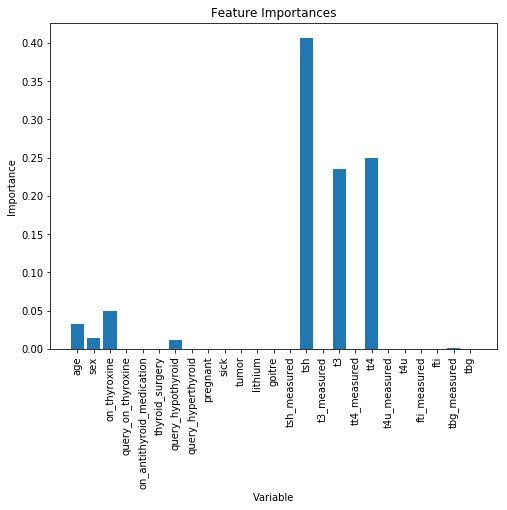

In [40]:
# representing the feature importances visually

# creating a list of x locations for plotting 
x_values = list(range(len(importances)))

# create a bar chart
plt.figure(figsize=(8,6))
plt.bar(x_values, importances, orientation='vertical')

# specifying the ticks for the x axis
plt.xticks(x_values, test_features, rotation= 'vertical')

plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Feature Importances')
plt.show()

The implications from the graph are that we can use six variables: tt4, t3, age, sex, on_thyroxine and tsh to predict whether a patient has hypothyroidism or not

The best three features are tsh, tt4 and t3 respectively

In [0]:
# using random forest classifier with six most important features
impot_features = hypo_cl[['tt4', 't3', 'tsh' , 'age', 'sex', 'on_thyroxine']].values
impot_target = hypo_cl['status'].values

# splitting the data into training and test sets
feat_train, feat_test, tar_train, tar_test = train_test_split(impot_features, impot_target, test_size=.25, random_state=34)

# scaling the train and test sets using stadard scaler
sscaler = StandardScaler()
feat_train = scaler.fit_transform(feat_train)
feat_test = scaler.transform(feat_test)

# instantiating the random forest classifier 
rfc_imp = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=20, max_depth=5)

# fitting the model with the training sets from important features
rfc_imp = rfc_imp.fit(feat_train, tar_train)

# making predictions based on the trained model
rfc_imp_pred = rfc_imp.predict(feat_test)



In [42]:
# creating a comparison dataframe that contains columns of actual and predicted status values
comp_frame = pd.DataFrame({'actual': tar_test.flatten(), 'predicted': rfc_imp_pred.flatten()})
comp_frame.head()

,actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0


In [43]:
# describing the comp_frame to compare the columns of predicted values and actual values
comp_frame.describe()

,actual,predicted
count,791.000000,791.000000
mean,0.963338,0.960809
std,0.188051,0.194172
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


There is a very slight difference in mean and standard deviation of the actual and predicted values

In [44]:
# Assessing the errors of the model with most important features only
print('Mean Absolute Error:', metrics.mean_absolute_error(tar_test, rfc_imp_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(tar_test, rfc_imp_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(tar_test, rfc_imp_pred)))
print('R2 squared:', metrics.r2_score(tar_test, rfc_imp_pred)) 
print('Accuracy Score:', metrics.accuracy_score(tar_test, rfc_imp_pred))


Mean Absolute Error: 0.007585335018963337
Mean Squared Error: 0.007585335018963337
Root Mean Squared Error: 0.08709382882250233
R2 squared: 0.7852294325278306
Accuracy Score: 0.9924146649810367


Using the six most important features, the accuracy of the model increased to 99.24% while the rmse decreased to 0.087

In [45]:
 fract_imp = np.sqrt(metrics.mean_squared_error(tar_test, rfc_imp_pred)) / comp_frame.actual.mean()
 print('Percent of rmse wrt mean: ' + str(np.around(fract_imp * 100, decimals=2))+ '%')

Percent of rmse wrt mean: 9.04%


The rmse is less than 10% of the mean of the actual mean, implying that the model is appropriate for predicting whether a patient has hypothyroidism

### Using Gradient Boosting Classifier

In [0]:
# splitting the features and target variables to train and test sets
gbfeat_train, gbfeat_test, gbtarget_train, gbtarget_test = train_test_split(impot_features, impot_target, test_size=.25, random_state=34)

In [0]:
# scaling the train and test sets using minmaxscaler
mscaler = MinMaxScaler()
gbfeat_train = mscaler.fit_transform(gbfeat_train)
gbfeat_test = mscaler.transform(gbfeat_test)

In [48]:
lr_list = [.05, .075, .1, .25, .5, .75, 1]

for lr in lr_list:
  gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=lr, \
                                      max_features=2, max_depth=5, random_state=42)
  # fitting the model with scaled data
  gboost.fit(gbfeat_train, gbtarget_train)

  print('Learning rate: ', lr)
  print('Training set accuracy score: {0:.3f}' .format(gboost.score(gbfeat_train, gbtarget_train)))
  print('Test set accuracy score: {0:.3f}' .format(gboost.score(gbfeat_test, gbtarget_test)))

Learning rate:  0.05
Training set accuracy score: 0.999
Test set accuracy score: 0.991
Learning rate:  0.075
Training set accuracy score: 0.999
Test set accuracy score: 0.991
Learning rate:  0.1
Training set accuracy score: 0.999
Test set accuracy score: 0.991
Learning rate:  0.25
Training set accuracy score: 0.999
Test set accuracy score: 0.992
Learning rate:  0.5
Training set accuracy score: 0.999
Test set accuracy score: 0.990
Learning rate:  0.75
Training set accuracy score: 0.956
Test set accuracy score: 0.967
Learning rate:  1
Training set accuracy score: 0.918
Test set accuracy score: 0.933


Best learning rate is 0.25 as it has the highest test set accuracy

In [49]:
# from sklearn.metrics import accuracy_score
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, \
                                  max_features=2, max_depth=5, random_state=42)
gb_clf.fit(gbfeat_train, gbtarget_train)
gb_pred = gb_clf.predict(gbfeat_test)

print('Confusion matrix: \n', metrics.confusion_matrix(gbtarget_test, gb_pred))
print('\nAccuracy Score: ', metrics.accuracy_score(gbtarget_test, gb_pred))
print('\nClassification report \n', metrics.classification_report(gbtarget_test, gb_pred))


Confusion matrix: 
 [[ 26   3]
 [  7 755]]

Accuracy Score:  0.9873577749683944

Classification report 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       1.00      0.99      0.99       762

    accuracy                           0.99       791
   macro avg       0.89      0.94      0.92       791
weighted avg       0.99      0.99      0.99       791



### Using ADA Boost Classifier

In [0]:
# splitting our features and target variables into training and test sets
# size of test set is 25% of total size of dataset
adfeat_train, adfeat_test, adtarget_train, adtarget_test = train_test_split(impot_features, impot_target, \
                                                                            test_size=0.25, random_state=34)

In [0]:
# instantiating the ada boost classifier object

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# training adaboost classifier
adamodel = abc.fit(adfeat_train, adtarget_train)

# predicting from test set
ad_pred = adamodel.predict(adfeat_test)

In [52]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print('Ada Boost Classifier Accuracy: ', round(metrics.accuracy_score(adtarget_test, ad_pred) * 100, 2),'%')
print('Gradient Boosting Classifier Accuracy: ', round(metrics.accuracy_score(adtarget_test, gb_pred) * 100, 2),'%')
print('Random Forest Classifier Accuracy:', round(metrics.accuracy_score(tar_test, rfc_imp_pred) * 100, 2),'%')
# metrics.accuracy_score(adtarget_test, ad_pred)
# print('\n')
# metrics.accuracy_score(adtarget_test, gb_pred)

Ada Boost Classifier Accuracy:  98.86 %
Gradient Boosting Classifier Accuracy:  98.74 %
Random Forest Classifier Accuracy: 99.24 %


The best two models in terms of accuracy score are random forest classifier and the ada boost classifier respectively.

In [53]:
# creating a new dataframe that contain the actual values and values predicted by ada boost classifier as two columns
adcomp_frame = pd.DataFrame({'actual': adtarget_test.flatten(), 'adapredicted': ad_pred.flatten()})

# previewing the last five observations to identify differences in the predicted and actual values
adcomp_frame.tail()

,actual,adapredicted
786,1,1
787,1,1
788,1,1
789,1,1
790,1,1


All the predicted values resemble the actual values, implying that the model was very accurate

## Predictions Using Support Vector Machines

In [54]:
# previewing the first five observations in the dataframe
hypo_cl.head()
print('\n')

# previewing the value_counts of the status column
hypo_cl.status.value_counts()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,0,72.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,31.283077
1,0,15.0,1.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,31.283077
2,0,24.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,31.283077
3,0,24.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,31.283077
4,0,77.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,31.283077


1    3012
0     151
Name: status, dtype: int64

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

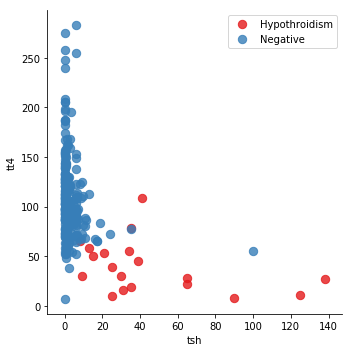

In [55]:
# plotting data and regression model
plt.figure(figsize=(10,8))
sample_hypo = hypo_cl.sample(300, random_state=308)
sns.lmplot('tsh', 'tt4', data=sample_hypo, hue='status', legend=False, palette='Set1', fit_reg=False, scatter_kws={'s': 70})
plt.legend({'Hypothroidism': 0, 'Negative': 1})
plt.title('A Plot Data and Regression Model Fits Across a FacetGrid.')
plt.show();

### Fitting the Model

In [0]:
# input for the model
tsh_tt4 = sample_hypo[['tsh', 'tt4']].values
# specifying label for the model
label_type = sample_hypo['status'].values

tsh_train, tsh_test, label_ttrain, label_ttest = train_test_split(tsh_tt4, label_type, test_size=.25, random_state=34)


#### Using Linear Kernel

In [0]:
# fitting the model
svmodel = SVC(kernel = 'linear')
svclass = svmodel.fit(tsh_train, label_ttrain)

[]

[]

Text(0.5, 1.0, 'Hypothyroid Classification with linear SVC')

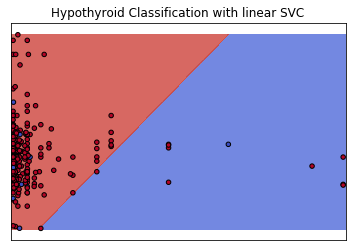

In [58]:

# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = svclass.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with linear SVC')
# Set-up grid for plotting.
t_sam = np.random.choice(tsh_tt4[:, 0], 300)
t_sam2 = np.random.choice(tsh_tt4[:, 1], 300)
X0, X1 = t_sam,t_sam2
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svclass, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=label_type, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# ax.set_ylabel('TT4')
# ax.set_xlabel('TSH')
ax.set_xticks(())
# ax.legend(['Hypothyroid', 'Negative'])
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [59]:
# Function that predict whether a patient has hypothyroidism or not

def hypothyroid_or_negative(tsh, tt4):
    if(svmodel.predict([[tsh, tt4]]))== 0:
        print('You\'re looking at a patient with Hypothyroidism!')
    elif(svmodel.predict([[tsh,tt4]]))==1:
        print('You\'re looking at a patient without Hypothyroidism!')
    

# Predict the implications of tsh levels of 0 and tt4 levels of 15
hypothyroid_or_negative(0,15)

You're looking at a patient without Hypothyroidism!


In [0]:
# making predictions with the polynomial model
linsvc_pred = svmodel.predict(tsh_test)

In [61]:
# evaluating the performance of the model
print('Accuracy Score: {:.2f}%'.format(metrics.accuracy_score(label_ttest, linsvc_pred) * 100))
print('Confusion Matrix: \n', metrics.confusion_matrix(label_ttest, linsvc_pred))

Accuracy Score: 96.00%
Confusion Matrix: 
 [[ 4  3]
 [ 0 68]]


#### Using Polynomial Kernel

In [0]:
# taking a sample of the data to reduce the training time for the model
pol_sam = hypo_cl.sample(300, random_state=308)

In [63]:
# input for the model
polfeat = pol_sam[['tsh', 'tt4']].values
# specifying label for the model
poltar = pol_sam['status'].values

polfeat.shape
poltar.shape

(300, 2)

(300,)

In [0]:
# splitting data into training and test sets
polfeat_train, polfeat_test, poltar_train, poltar_test = train_test_split(polfeat, poltar, test_size=0.24, random_state=34)

In [65]:
# instantiating the model
polyclassif = SVC(kernel='poly', degree=3, gamma='auto', random_state=308)

# training the model usin the training sets
polyclassif.fit(polfeat_train, poltar_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=308, shrinking=True, tol=0.001,
    verbose=False)

[]

[]

Text(0.5, 1.0, 'Flower Classification with polynomial SVC')

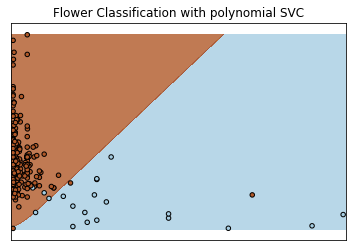

In [66]:
# visualizing the data points in the kernel
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassif.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with polynomial SVC')

# Set-up grid for plotting.
# pol_sam = np.random.choice(polfeat[:, 0], 300)
# pol_sam2 = np.random.choice(polfeat[:, 1], 300)
X0, X1 = polfeat[:, 0], polfeat[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassif, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=poltar, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

For polynomial kernel, the gamma parameter improves the performance/classification of data points. 

In [0]:
# making predictions with the polynomial model
polsvc_pred = polyclassif.predict(polfeat_test)

In [68]:
# evaluating the performance of the model
print('Accuracy Score: {:.2f}%'.format(metrics.accuracy_score(poltar_test, polsvc_pred) * 100))
print('Confusion Matrix: \n', metrics.confusion_matrix(poltar_test, polsvc_pred))

Accuracy Score: 98.61%
Confusion Matrix: 
 [[ 6  1]
 [ 0 65]]


SVC with a polynomial kernel predicts with an accuracy of 98.61%

#### Fitting Model With Radial Basis Function (rbf)

In [69]:
# instantiating the rbf model
rbfclassif = SVC(kernel='rbf', random_state=308, gamma='auto')

# training the rbf model with the training set.
rbfclassif.fit(polfeat_train, poltar_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=308, shrinking=True, tol=0.001,
    verbose=False)

[]

[]

Text(0.5, 1.0, 'Hypothyroidism Classification with rbf SVC')

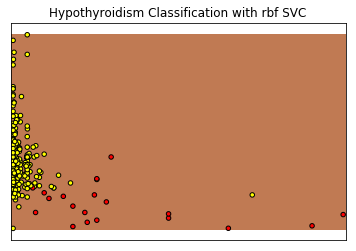

In [0]:
# visualizing the rbf kernel
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassif.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroidism Classification with rbf SVC')
# Set-up grid for plotting.
XX0, XX1 = polfeat[:, 0], polfeat[:, 1]
xx, yy = make_meshgrid(XX0, XX1)

plot_contours(ax, rbfclassif, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(XX0, XX1, c=poltar, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [0]:
# making prediction
rbfsvc_pred = rbfclassif.predict(polfeat_test)

In [71]:
# Model Evaluation
print('RBF SVC Accuracy Score: {:.2f}%'.format(metrics.accuracy_score(poltar_test, rbfsvc_pred) * 100))
print('Confusion Matrix:\n', metrics.confusion_matrix(poltar_test, rbfsvc_pred))

RBF SVC Accuracy Score: 90.28%
Confusion Matrix:
 [[ 0  7]
 [ 0 65]]


The polynomial kernel is the best performing kernel for this prediction problem with an accuracy of 98.61%.

The rbf kernel has an accuracy of 90.28% while the linear kerne has an accuracy of 96%


#### Hyperparameter Tuning for the Polynomial kernel

In [0]:
def svm_param_tuning(x, y, nfolds):
  Cs = [0.001, 0.01, 0.1, 1]
  gammas = [0.001, 0.01, 0.1, 1]
  param_grid = {'C': Cs, 'gamma': gammas}
  gsearch = GridSearchCV(SVC(kernel='poly', random_state=308), \
                         param_grid, cv=nfolds)
  gsearch.fit(x,y)
  bestparams = gsearch.best_params_
  return bestparams

svm_param_tuning(polfeat_train, poltar_train, 5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.1, 'gamma': 0.1}

According to the gridsearch, the best parameters for the polynomial kernel are C = 0.1 and gamma = 0.1

In [0]:
# taking a sample of the data to reduce the training time for the model
adpol_sam = hypo_cl.sample(300, random_state=308)

In [0]:
# input for the model with additional features
adpolfeat = adpol_sam.drop('status', 1).values

# specifying label for the model
adpoltar = adpol_sam['status'].values


In [0]:
# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(adpolfeat)
adpolfeat = pca.transform(adpolfeat)


In [0]:
# splitting data inot training and test sets
adpolfeat_train, adpolfeat_test, adpoltar_train, adpoltar_test = train_test_split(adpolfeat, adpoltar, \
                                                                                 test_size=0.25, random_state=34)

In [79]:
# instantiating the model
adpolyclassif = SVC(kernel='poly', degree=3, gamma=0.1, C=0.1, random_state=308)

# training the model with additional features using the training sets
adpolyclassif.fit(adpolfeat_train, adpoltar_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=308, shrinking=True, tol=0.001,
    verbose=False)

[]

[]

Text(0.5, 1.0, 'Hypothyroidism Classification with polynomial SVC with Additional Features')

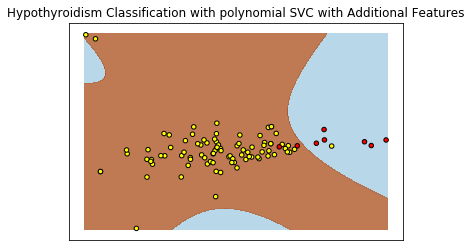

In [0]:
# visualizing the rbf kernel
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plott_contours(ax, clf, xx, yy, **params):
    ZZ = adpolyclassif.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = ZZ.reshape(xx.shape)
    out = ax.contourf(xx, yy, ZZ, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroidism Classification with polynomial SVC with Additional Features')
# Set-up grid for plotting.
XXX0, XXX1 = adpolfeat[:, 0], adpolfeat[:, 1]
xx, yy = make_meshgrid(XXX0, XXX1)

plott_contours(ax, adpolyclassif, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(XXX0, XXX1, c=adpoltar, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show();

In [0]:
# figure above was plotten with a sample of 150 observations from the features and target variable

In [0]:
# making prediction
adpol_pred = adpolyclassif.predict(adpolfeat_test)

In [81]:
# Model Evaluation with additional features
print('Accuracy Score of Polynomial Kernel with Additional Features:\n' ,metrics.accuracy_score(adpoltar_test, adpol_pred) * 100, '%')
print('Confusion Matrix:\n', metrics.confusion_matrix(adpoltar_test, adpol_pred))

Accuracy Score of Polynomial Kernel with Additional Features:
 100.0 %
Confusion Matrix:
 [[ 7  0]
 [ 0 68]]


With more features added to the training set, the prediction accuracy of the polynomial kernel SVC increases to 100%

The high accuracy of the model can be attributed to the fact that a very small sample of data (200 rows) was used to train the model.

A small sample was used to reduce the computation time and power required by the model when handling large datasets

## Challenging the Solution

In [85]:
# challenging solution with sigmoid SVC

# Building the model 
sigclassifier = SVC(kernel='sigmoid', C=0.1, gamma=0.1, random_state=308)
# Training the model using the training set
sigclassifier.fit(adpolfeat_train, adpoltar_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=308, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
# making prediction
adsig_pred = sigclassifier.predict(adpolfeat_test)

In [87]:
# Model Evaluation
print('Sigmoid Kernel Accuracy Score: {:.2f}%' .format(metrics.accuracy_score(adpoltar_test, adsig_pred) * 100))
print('Confusion Matrix: \n', metrics.confusion_matrix(adpoltar_test, adsig_pred))

Sigmoid Kernel Accuracy Score: 90.67%
Confusion Matrix: 
 [[ 0  7]
 [ 0 68]]


SVC with sigmoid kernel predicts with an accuracy of 90.67%, which is less than the accuracy of almost all the models used for this project.

Therefore, the models used for prediction can serve as better models for predicting hypothyroidism than SVC with sigmoid kernel

In [0]:
# challenging the solution by comparing the mean and standard deviation of actual and predicted values
adcomp_frame = pd.DataFrame({'actual': adpoltar_test, 'adpredicted': adpol_pred})
adcomp_frame.describe()

,actual,adpredicted
count,75.000000,75.000000
mean,0.906667,0.906667
std,0.292858,0.292858
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


There is a slight difference in the mean and standard deviation of the actual values and the values predicted by the polynomial kernel with additional features

The tiny difference in mean and std implies that our model is a good fit for this problem

## Conclusion

Random Forests, Ada Boosted Trees, Gradient Boosted and SVCs are generally good prediction models for testing for hypothyroidism

Even though the sigmoid SVC is best suited for binary classification, it did not perform as well as the models mentioned above.

The best performing SVC was the polynomial kernel